<h1><center>Laboratorio 1 Data Science</center></h1>
<h2><center>Catedrático Ing Luis Furlan</center></h2>
<h3><center>Realizado por:</center></h3>
<h3><center>David Cuellar 18382, Augusto Alonso</center></h3>
<h3><center>Grupo #6</center></h3>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [3]:
sample = pd.read_csv("data/sample_submission.csv")
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

## Nota
Dado que en la clase no hemos abarcado temas como PCA y reglas de asociación, con la autorización de Furlan no vamos a realizar esta parte del laboratorio,
además se decidio trabajar con el dataset de train porque es el más grande

# 1. Descripcion de las variables

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# train.info()
lista = ["Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Categorica","Categorica","Categorica","Categorica","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Cuantitativa continua","Categorica","Categorica","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua",
	"Cuantitativa continua","Categorica","Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua",
	"Cuantitativa continua","Cuantitativa continua","Cuantitativa discreta","Cuantitativa discreta","Cuantitativa discreta",
	"Cuantitativa discreta","Cuantitativa discreta","Cuantitativa discreta","Categorica","Cuantitativa discreta",
	"Categorica","Cuantitativa discreta","Categorica","Categorica","Cuantitativa continua","Categorica",
	"Cuantitativa continua","Cuantitativa continua", "Categorica","Categorica","Categorica","Cuantitativa continua",
	"Cuantitativa continua","Cuantitativa continua","Cuantitativa continua","Cuantitativa continua","Cuantitativa continua",
	"Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua","Cuantitativa continua",
	"Categorica","Categorica","Cuantitativa continua"]

In [6]:
df = pd.DataFrame(train.dtypes)

In [7]:
df["Tipo de variable"] = lista
df.columns = ["Tipo de objeto en python","Tipo de variable"]
df.head()

,Tipo de objeto en python,Tipo de variable
Id,int64,Categorica
MSSubClass,int64,Categorica
MSZoning,object,Categorica
LotFrontage,float64,Cuantitativa continua
LotArea,int64,Cuantitativa continua


In [8]:
df.to_excel("datatype.xlsx")

## Variables no Categoricas
Procederemos a encontrar todas las vairables que tenemos que no sean categoricas.

In [9]:
df.loc[df["Tipo de variable"] != "Categorica"].index

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

De los resultados notamos que son aproximadamente la mitad.

## Variables Categoricas
Procederemos ahora a encontrar las vairables que si son categoricas

In [10]:
df.loc[df["Tipo de variable"] == "Categorica"].index

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

Lo primero que notamos es que la diferencia entre ambas cantidades es poca pero si predominan las variables categoricas en este dataset.

# 2. Analisis exploratorio rapido

In [11]:
train.shape

(1460, 81)

Dentro de nuestro dataset notamos que contenemos 1460 filas lo cual lo haria un dataset de tamaño regular. Y cuenta con 81 filas.

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Luego de hacer una breve descripcion dentro de cada una de nuesras columnas notamos que varias de ellas como (MasVnrArea, BsmtFinSF1, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal) Tienen como valor minimo estos valores no tienen sentido en la logica de columna y son nuestros equivalentes a NaN es mas en algunos el 25% se encuentra en 0.

In [13]:
cuantitatives = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
cualitatives = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
print("La canitdad de columnas cuantitativas son : ", len(cuantitatives))
print("La canitdad de columnas cualitativas son : ", len(cualitatives))

La canitdad de columnas cuantitativas son :  33
La canitdad de columnas cualitativas son :  48


## El dataset se compone de 1460 registros y 80 variables
## La distribución de variables en el dataset es la siguiente:
### -  33 variables cuantitativas
### -  47 variables cualitativas (No se toma en cuenta el id)


# 3. Analisis de correlacion entre variables cuantitativas

A continuacion haremos una copia de nuestro data set excluyendo a todas las vairables cualitativas.

In [14]:

cuantitative_df = train.loc[:,cuantitatives] 
cuantitative_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,0,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,0,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,0,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:>

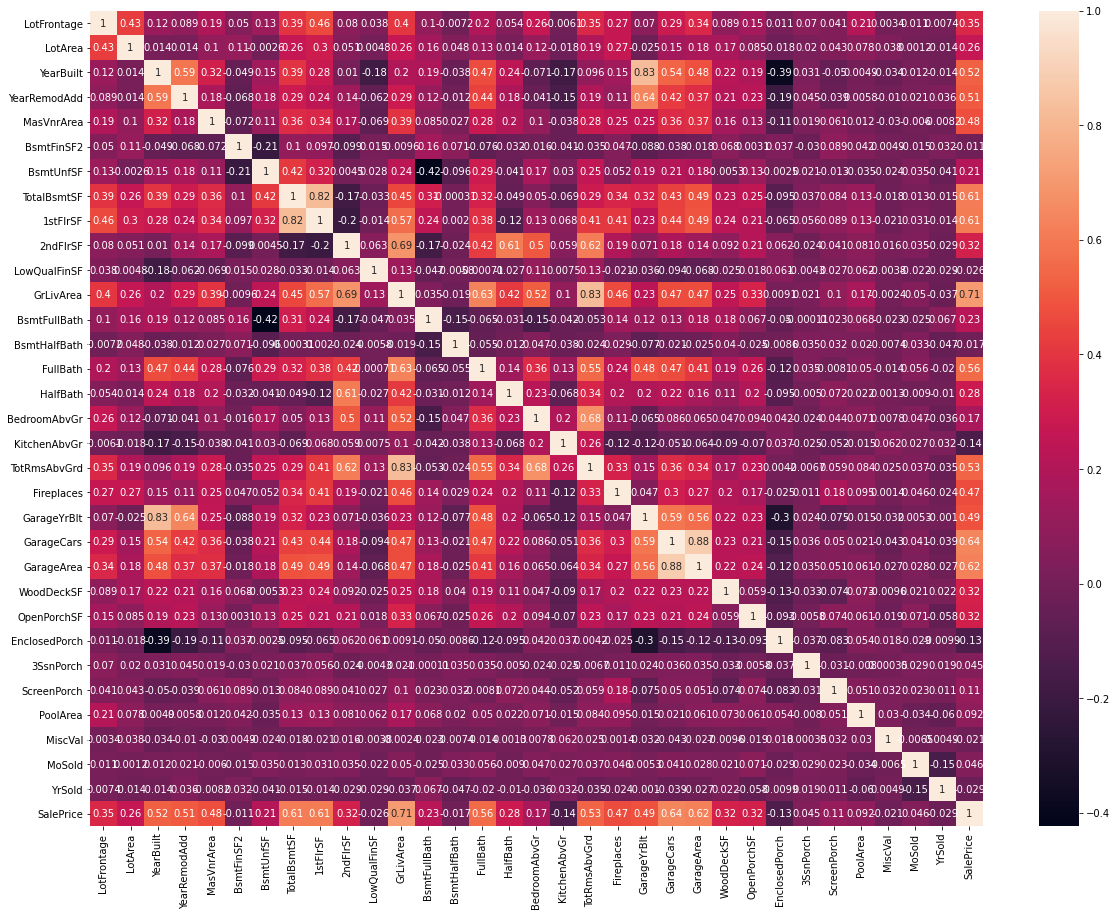

In [15]:
plt.subplots(figsize=(20,15))
sns.heatmap(cuantitative_df.corr(), annot = True)

### Primeras observaciones
Notamos que nuestro heatmap muestra que la mayoria de datos no muestran mayor correlación entre si. Algunas que notamos que si se deuestra bastante correlacion es como YearBlt (año en que se construyo) y Garage year built lo cual tiene sentido la mayoria compartiran fecha. O por ejmplo otra que notamos es Garage area y Garage cars Entre mas área tenga el garage.

### Con base a la gráfica de arriba se decidieron hacer scatter plots solamente de las variables que tienen una correlación mayor a 0.8

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

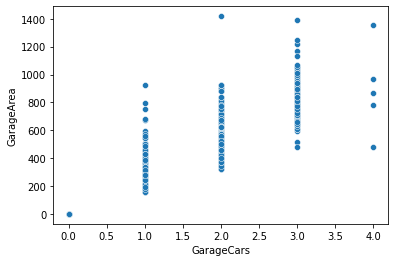

In [16]:
sns.scatterplot(data = cuantitative_df,x = 'GarageCars', y = 'GarageArea')

Observando la grafica de carros por garage y area en el garage notamos que la cantidad de carros va aumentando entre mas area es mas notamos que minimo para que haya un carro deben de haber 200 pies cuadrados y para que hayan dos carros minimo va rozando los 400 pies cuadrados podemos inferir de esto que definitivamente una familia promedio necesitara unos 300 pies cuadrados como area para su carro.

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>

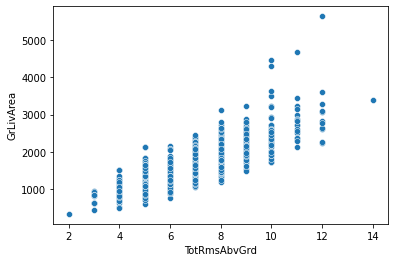

In [17]:
sns.scatterplot(data = cuantitative_df,x = 'TotRmsAbvGrd', y = 'GrLivArea')

Al comparar TotRmsAbvGrd con GrLivArea notamos que entre mas cuartos posea mas area habra.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

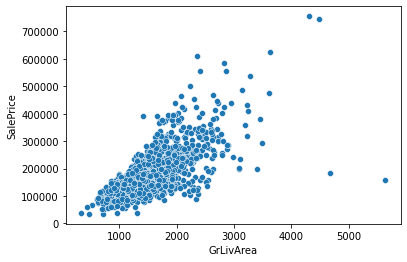

In [18]:
sns.scatterplot(data = cuantitative_df,x = 'GrLivArea', y = 'SalePrice')

Este grafico ya es mas interesante notamos que entre mas area de vivienda mas caro sera su precio en promedio.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='1stFlrSF'>

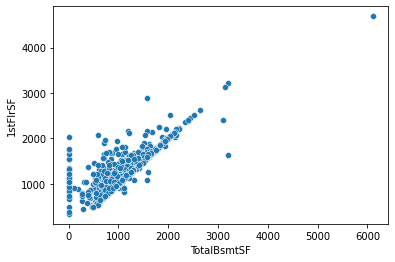

In [19]:
sns.scatterplot(data = cuantitative_df,x = 'TotalBsmtSF', y = '1stFlrSF')

En este grafico notamos que tiene un comportamiento casi que lineal y lo que esto nos inidca es que habra mas ara en el primer piso entre mas area tenga el sotano.

# Histogramas

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>]], dtype=object)

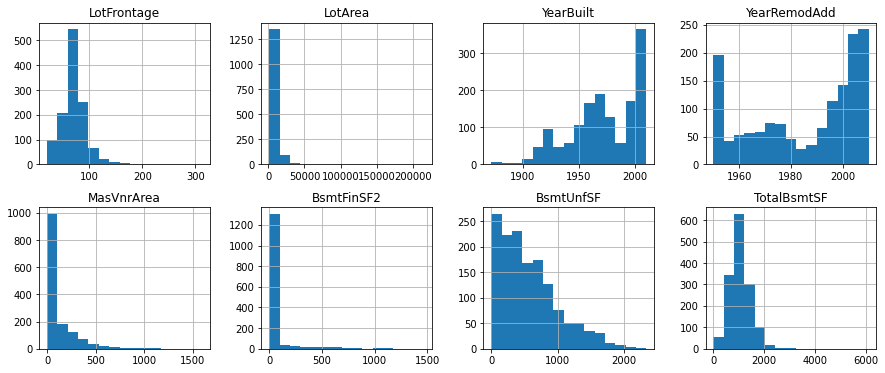

In [19]:
cuantitative_df.iloc[:,0:8].hist(bins=15, figsize=(15, 6), layout=(2, 4))

Dentro de nuestros primeros histogramas notamos que 5 de ellos estas sesgados hacia la derecha (la mayoria).
Solo uno de ellos tiene sesgo a la izquierda y el de YearRemoddAdd es el que se mira mejor distribuido en cuanto a paridad pero hay un incremento total en los ultimos años.

array([[<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>]], dtype=object)

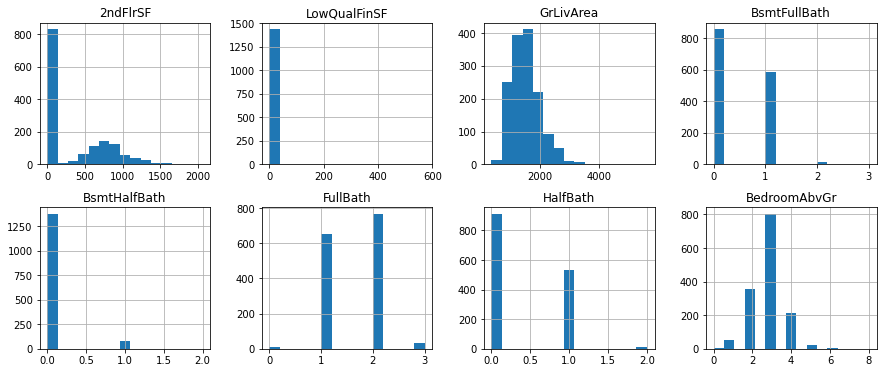

In [20]:
cuantitative_df.iloc[:,9:17].hist(bins=15, figsize=(15, 6), layout=(2, 4))

Nuestro siguiente lote de histogramas muestra de nuevo 5 con sesgo a la derecha. Y notamos algunos casos interesantes como baños completos nos animariamos a decir que el 90% de los datos se encuentran dentro de 1 o 2 baños y solo un pequeño grupo tenia 3 en cuanto a medios baños tambien casi todo el data set se enecuntra entre uno o 0 medios baños y la mayoria de casas tiene 3 dormitorios.


array([[<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>]], dtype=object)

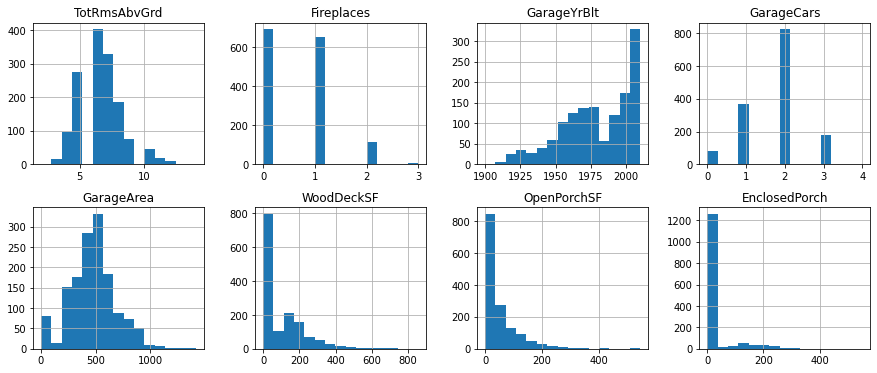

In [21]:
cuantitative_df.iloc[:,18:26].hist(bins=15, figsize=(15, 6), layout=(2, 4))

Siguiendo el patron de los pasados histogramas notamos que hay en la mayoria sesgo a la derecha y como datos interesantes notamos que la mayoria de casas tienen entre 1 y 2 carros y la mayoria tambien de casas tiene entre 400 y 600 pies cuadrados de area en su garage.

array([[<AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'MiscVal'}>,
        <AxesSubplot:title={'center':'MoSold'}>],
       [<AxesSubplot:title={'center':'YrSold'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

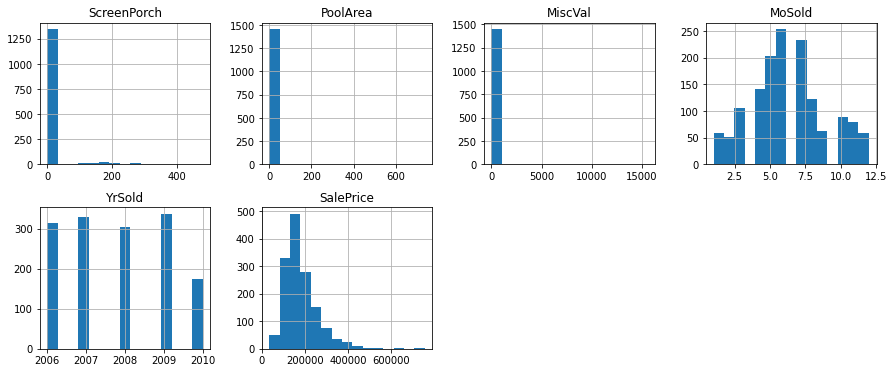

In [22]:
cuantitative_df.iloc[:,27:33].hist(bins=15, figsize=(15, 6), layout=(2, 4))

# Boxplots

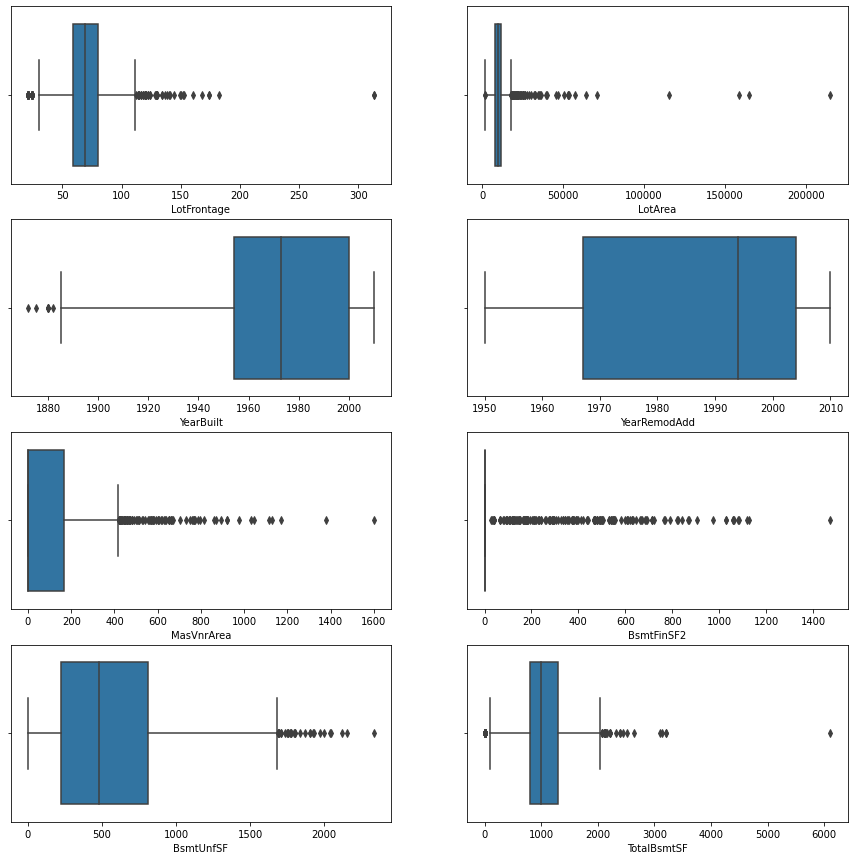

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(cuantitatives[0:8], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

Notamos que en la mayoria de nuestras graficas tenemos los datos bastantes disperos.  En algunos hasta es dificil determinar la media. Muchos de estos datos puede que no nos sean utilices dentro de nuestor dataset.

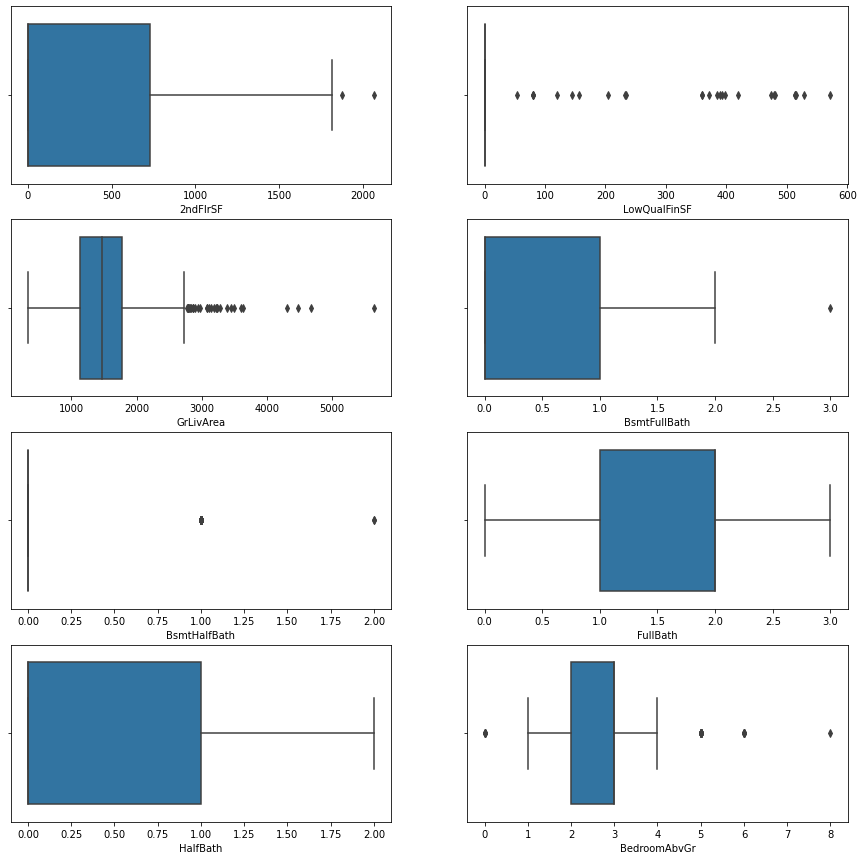

In [22]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(cuantitatives[9:17], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

Dentro de este grupo donde se encuentran las habitaciones los numeros baños, de medios baños notamos que aca los datos no se enceuntran tan dispersos excpeto en low qual sf donde si hayamos datos completamente disperos.

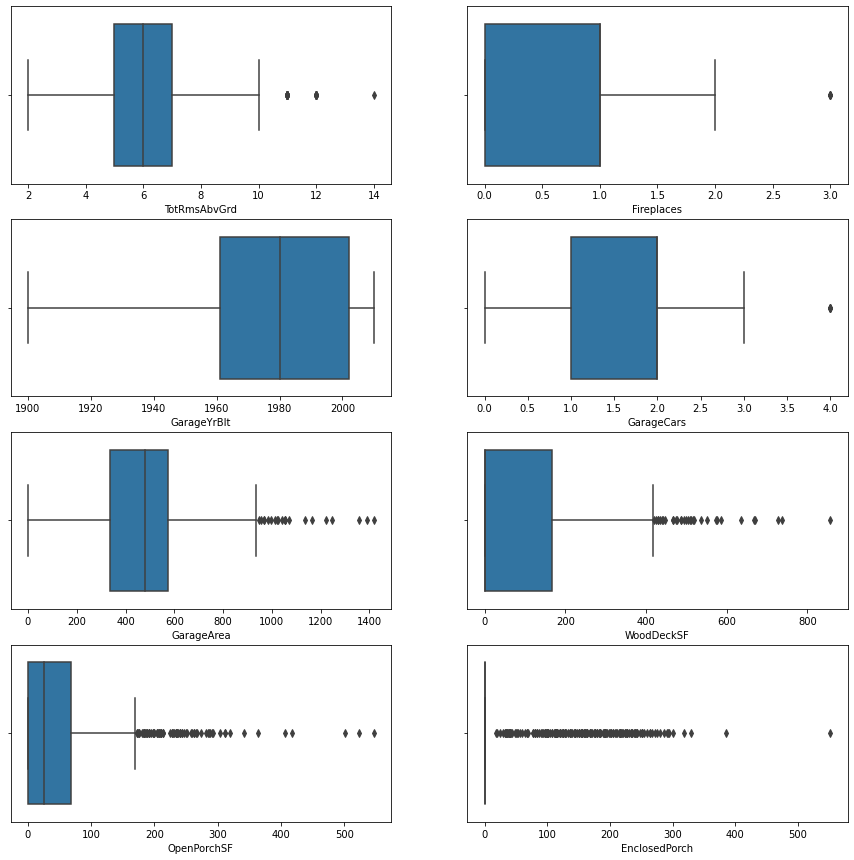

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(cuantitatives[18:26], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

Al igual que el grupo de arriba los que mas nos llaman la atencion son Open Proch SF y Enclosed Proch SF donde notamos los datos completamente dispersos.

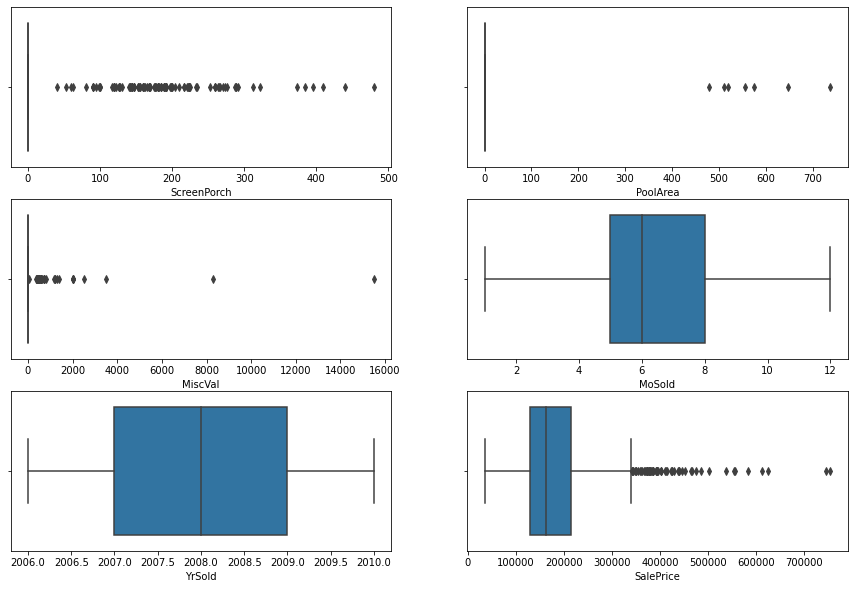

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for var, subplot in zip(cuantitatives[27:33], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

# 4. Exploring categorical data

In [25]:
cualitative_df = train.loc[:,cualitatives[1:]] 
cualitative_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

# Barplots

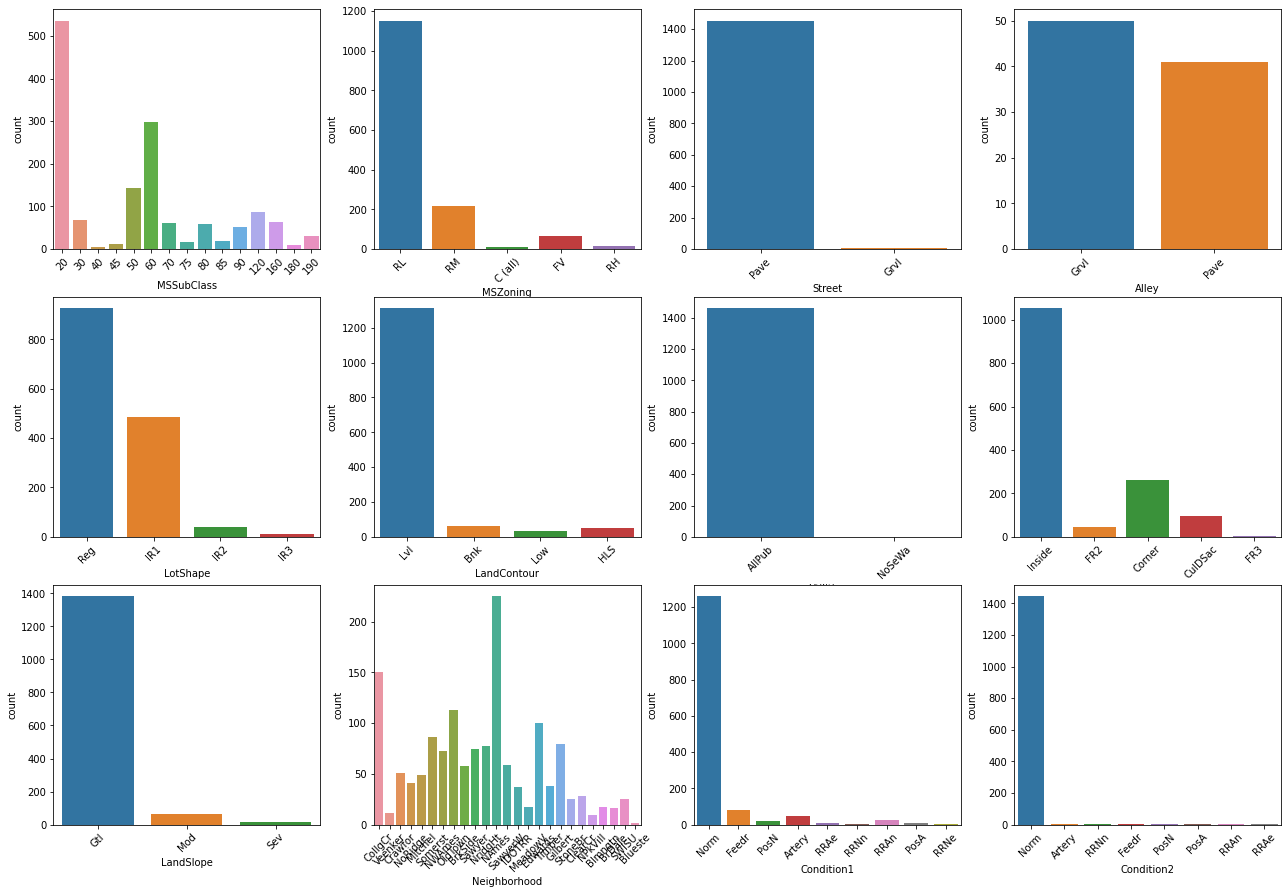

In [27]:
fig, ax = plt.subplots(3, 4, figsize=(22, 15))
for variable, subplot in zip(cualitatives[1:13], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

Lo primero que observamos es que en 9 de estos datos podrimamos decir que predominan uno o dos datos de los cualitativos demostrando que muy probablemente no influyan mucho dentro de la casa y su valor.

Ahora bien si observamos le vecindario notamos que hay una distribucion bastante grande de como estan repartidos.

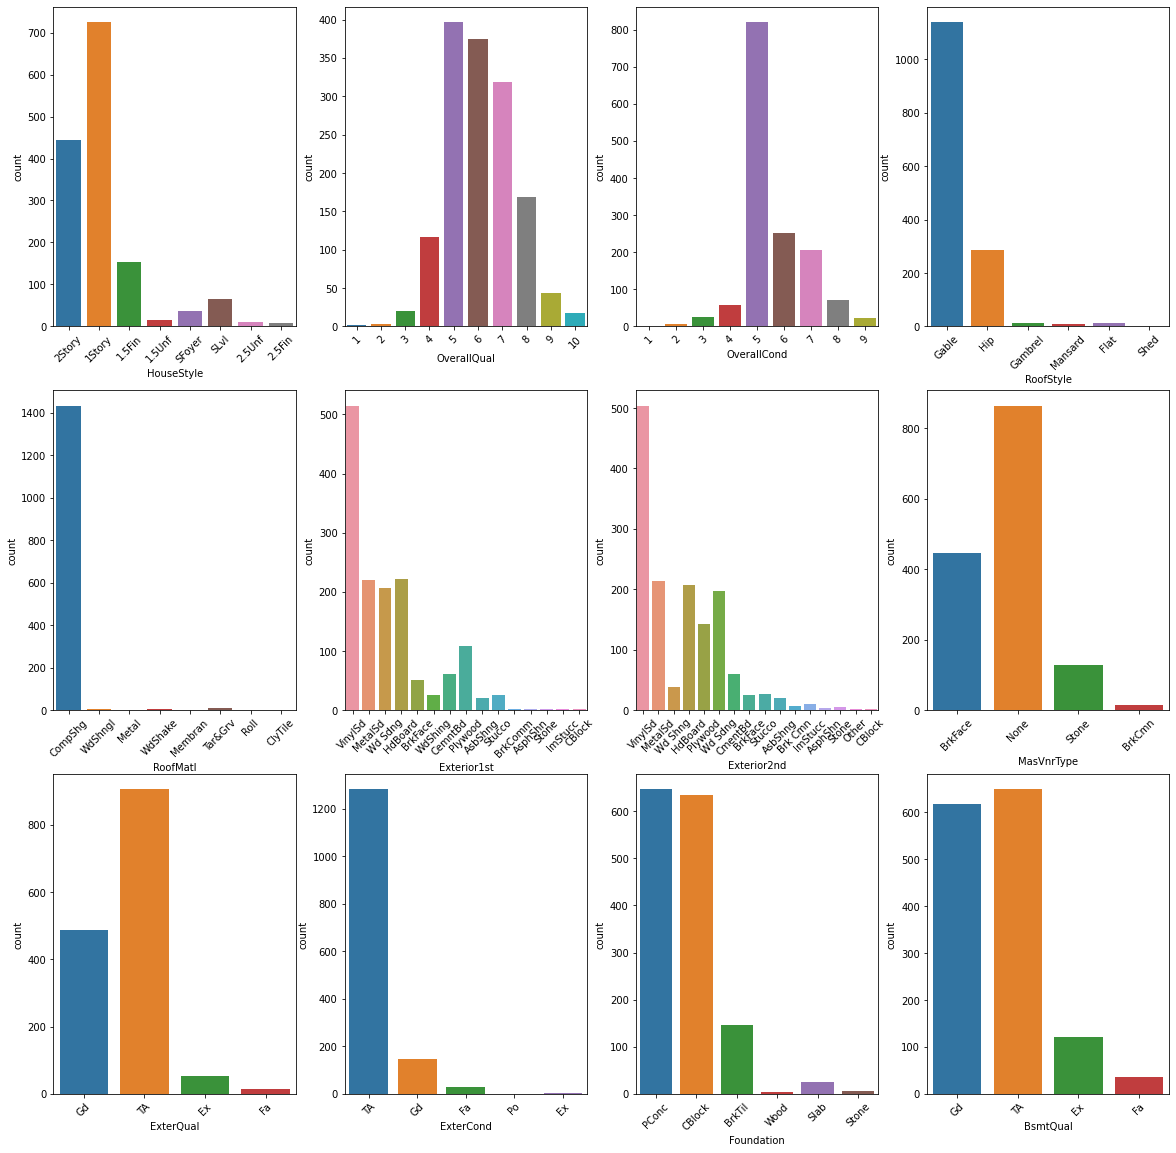

In [30]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
for variable, subplot in zip(cualitatives[14:26], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

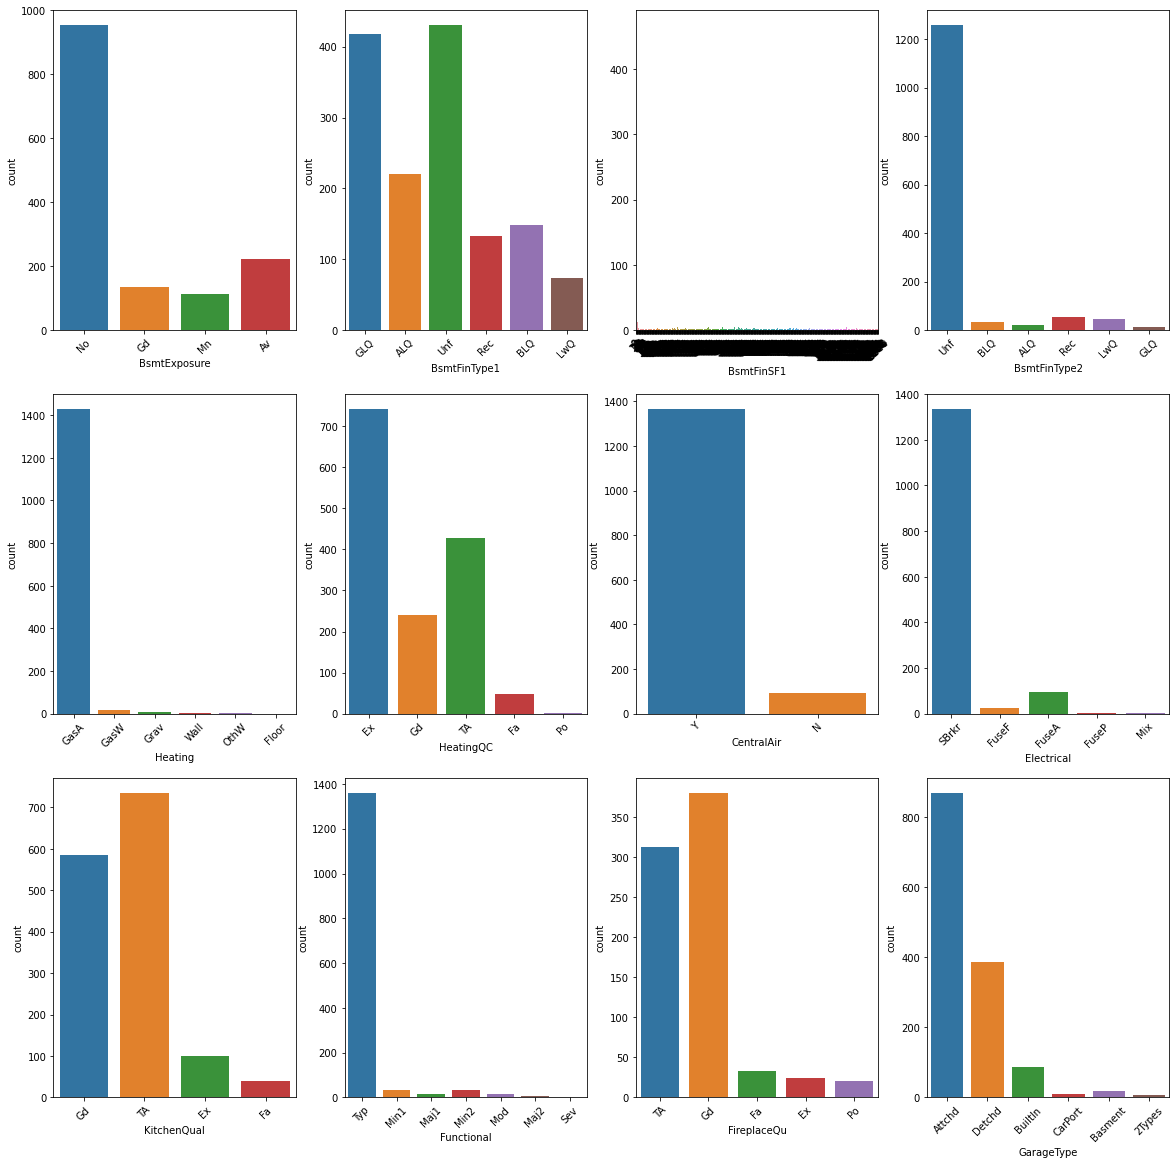

In [31]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
for variable, subplot in zip(cualitatives[27:39], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

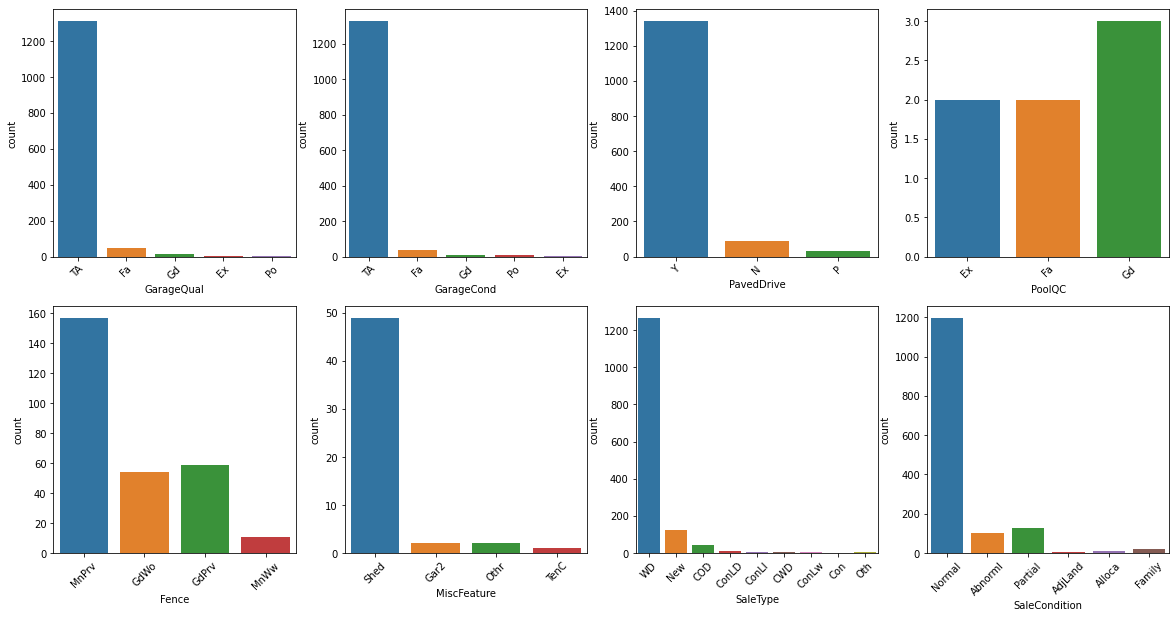

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[40:], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

# Pie plots

C:\Users\angel\anaconda3\envs\cenv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.


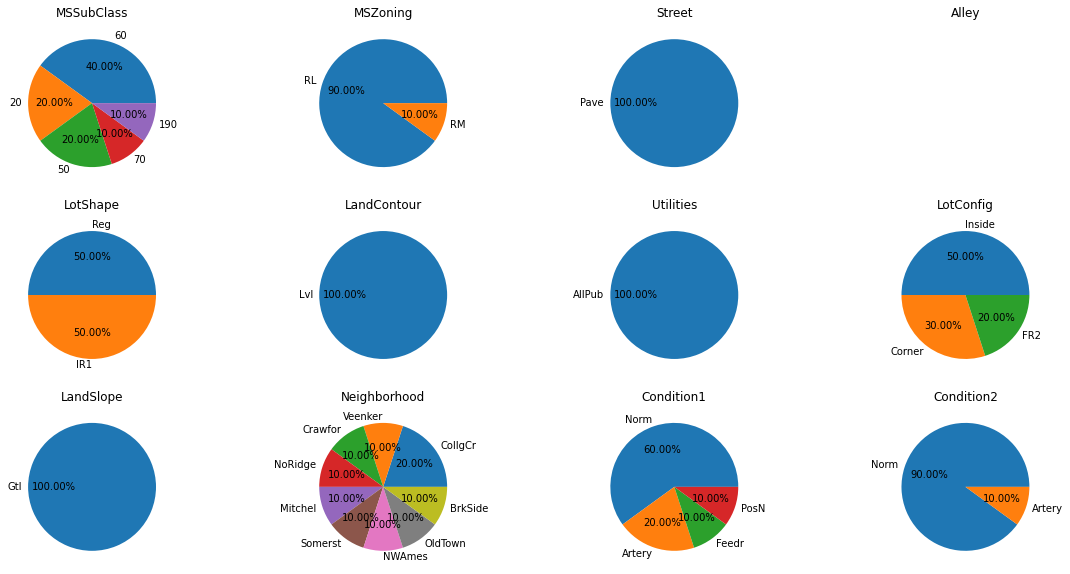

In [44]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[1:13], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

Como habiamos notado anteriormente en nuestro grafico de barras la mayoria de datos asi como MSZoning, Street, utilities estan un 90% predominados por un solo valor. Los mejor distribuidos son Neighnorhood, MSSubClass

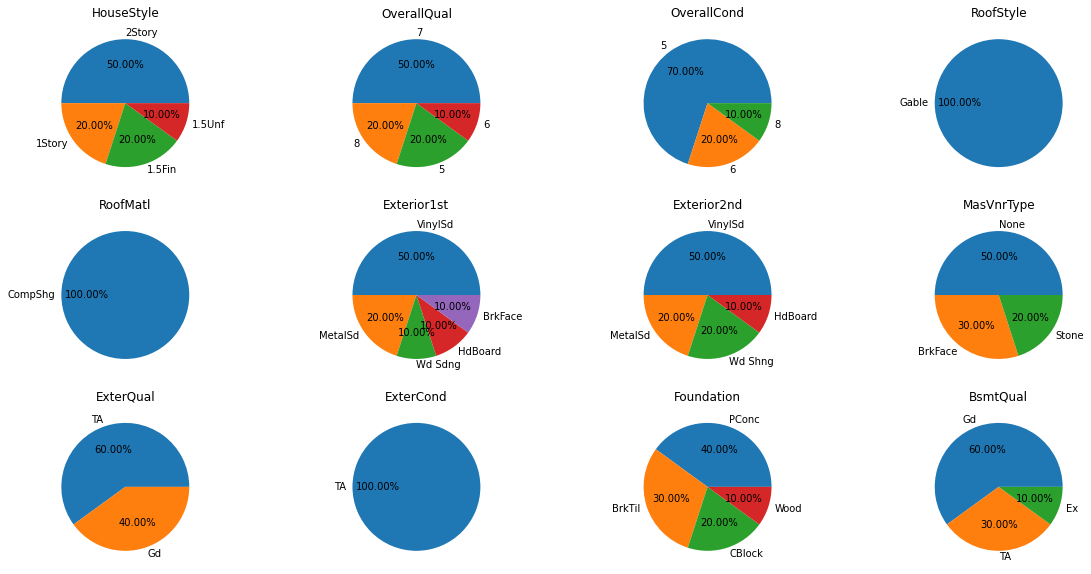

In [45]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[14:26], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

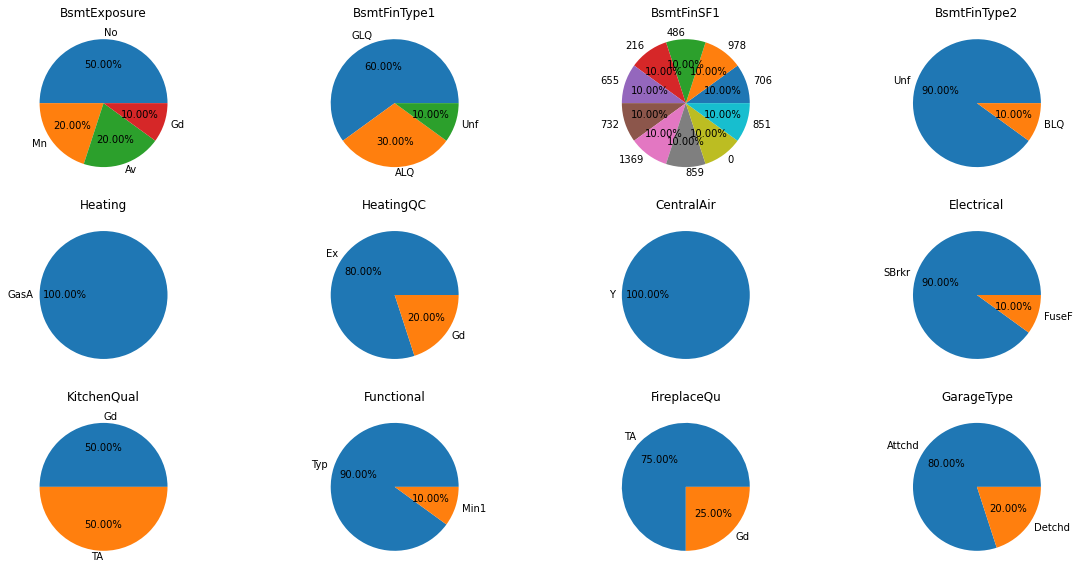

In [46]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[27:39], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

Lo primero que notamos aca es que hay 6 datos donde de nuevo predomina el 90% del valor un solo tipo. De ahi ya encontramos aspectos como la calidad de cocina que se distribuye un 50% y 50% en sus datos, O FirePlace Qu, HeatingQC donde es 80% y 20% sus distribuciones.

C:\Users\angel\anaconda3\envs\cenv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.


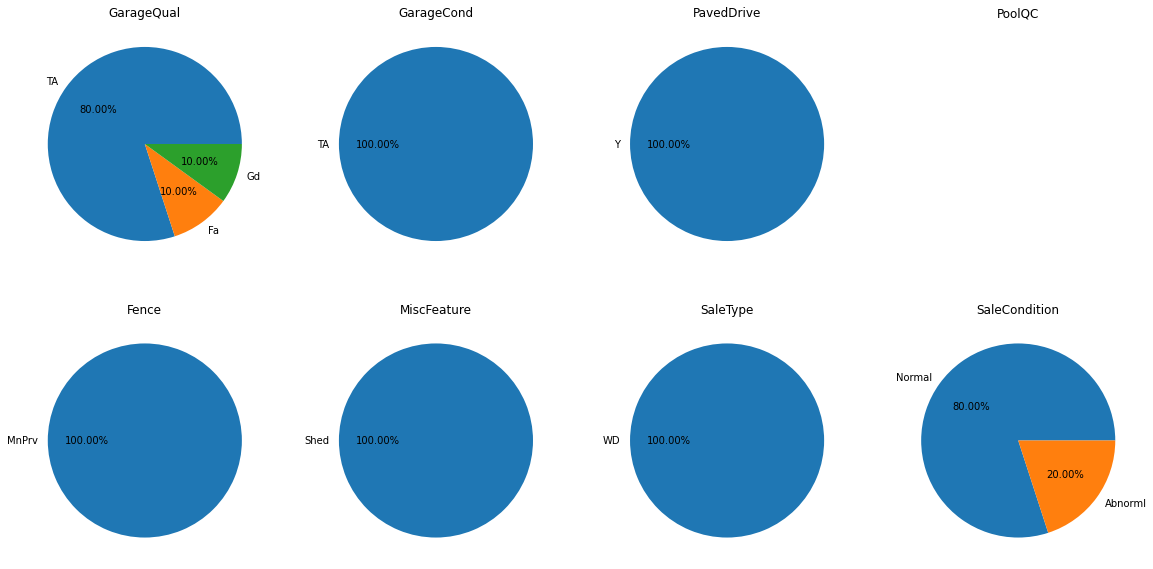

In [47]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[40:], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

# Hallazgos y conclusiones

## Hallazgos
- La mayoria de casas tiene y o 2 baños medios (ha de ser un factor de precio importante entre mas baños)
- Dentro del data set predominan la variables cualitativas
- La mayoria de vairables cuantitativas no demuestran correlacion
- La mayoria de casas albergaran entre 1-2 carros dentro de su garage
- La distribucion de vecindarios es variada
- Muchas de las variables cualitativas no cambian de valor
- La calidad del garage puede que sea un factor dentro de su precio donde los de mejor calidad sean las casas mas caras
- La mayoria de casas tiene buena calida
- Muchos de los datos cuantitativos se encuentran bastante dispersos

## Conclusión
Las casas cada dia son mas caras y el area es un factor que cada vez se ira reduciendo lo notamos en que el numero de cuartos, baños son bastante limitados y el area es un factor importante tanto de area de vivienda en general como garage.